In [18]:
from satsearch import Search
from satstac import ItemCollection

search = Search(bbox=[-110, 39.5, -105, 40.5],
               datetime='2019-02-12T00:00:00Z/2019-03-18T12:31:12Z',
               query={'eo:cloud_cover': {'lt': 10}},
               collections=['sentinel-s2-l2a'],
               url='https://earth-search.aws.element84.com/v0')
items = search.items()
print('%s items' % len(items))
print('%s collections' % len(items._collections))
print(items._collections)


for item in items:
    print(item)


14 items
1 collections
[sentinel-s2-l2a]
S2A_12TYK_20190316_0_L2A
S2A_12SXJ_20190316_0_L2A
S2A_12SWJ_20190316_0_L2A
S2A_13TBE_20190316_0_L2A
S2A_12TXK_20190316_0_L2A
S2A_12SYJ_20190316_0_L2A
S2A_12TWK_20190316_0_L2A
S2A_13TEE_20190310_0_L2A
S2A_13TDE_20190310_0_L2A
S2A_13SDD_20190310_0_L2A
S2A_12TXK_20190224_0_L2A
S2A_12TWK_20190224_0_L2A
S2A_12SWJ_20190224_0_L2A
S2B_13SED_20190213_0_L2A


In [40]:
items.save('test.json')
items2 = ItemCollection.open('test.json')
print(items2[0].assets['overview']['href'])
print(items2[0].assets.keys())
print(items2.summary(['date', 'id', 'eo:cloud_cover','sentinel:product_id']))

s3://sentinel-s2-l2a/tiles/12/T/YK/2019/3/16/0/qi/L2A_PVI.jp2
dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'visual_20m', 'visual_60m', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])
Items (14):
date                      id                        eo:cloud_cover            sentinel:product_id       
2019-03-16                S2A_12TYK_20190316_0_L2A  5.47                      S2A_MSIL2A_20190316T180101_N0211_R041_T12TYK_20190316T223500 
2019-03-16                S2A_12SXJ_20190316_0_L2A  4.15                      S2A_MSIL2A_20190316T180101_N0211_R041_T12SXJ_20190316T223500 
2019-03-16                S2A_12SWJ_20190316_0_L2A  4.87                      S2A_MSIL2A_20190316T180101_N0211_R041_T12SWJ_20190316T223500 
2019-03-16                S2A_13TBE_20190316_0_L2A  7.67                      S2A_MSIL2A_20190316T180101_N0211_R041_T13TBE_20190316T223500 
2019-03-16                S2A_12TXK_20190316_0_L2A  0.6      

In [41]:
#https://sentinelhub-py.readthedocs.io/en/latest/examples/aws_request.html
# download a specific asset from all items and put in a directory by date in 'downloads'
filenames = items.download('overview', filename_template='downloads/${date}/${id}')#metadata,thumbnail and overview are popular tags
print(filenames)


ERROR:satstac.item:Unable to download s3://sentinel-s2-l2a/tiles/12/T/YK/2019/3/16/0/qi/L2A_PVI.jp2: No connection adapters were found for 's3://sentinel-s2-l2a/tiles/12/T/YK/2019/3/16/0/qi/L2A_PVI.jp2'
ERROR:satstac.item:Unable to download s3://sentinel-s2-l2a/tiles/12/S/XJ/2019/3/16/0/qi/L2A_PVI.jp2: No connection adapters were found for 's3://sentinel-s2-l2a/tiles/12/S/XJ/2019/3/16/0/qi/L2A_PVI.jp2'
ERROR:satstac.item:Unable to download s3://sentinel-s2-l2a/tiles/12/S/WJ/2019/3/16/0/qi/L2A_PVI.jp2: No connection adapters were found for 's3://sentinel-s2-l2a/tiles/12/S/WJ/2019/3/16/0/qi/L2A_PVI.jp2'
ERROR:satstac.item:Unable to download s3://sentinel-s2-l2a/tiles/13/T/BE/2019/3/16/0/qi/L2A_PVI.jp2: No connection adapters were found for 's3://sentinel-s2-l2a/tiles/13/T/BE/2019/3/16/0/qi/L2A_PVI.jp2'
ERROR:satstac.item:Unable to download s3://sentinel-s2-l2a/tiles/12/T/XK/2019/3/16/0/qi/L2A_PVI.jp2: No connection adapters were found for 's3://sentinel-s2-l2a/tiles/12/T/XK/2019/3/16/0/q

[]


In [9]:
from sentinelhub import AwsProductRequest
#S2B_MSIL2A_20180316T180059_N0001_R041_T12SXJ_20200715T165611
tile_id = 'S2A_OPER_MSI_L1C_TL_MTI__20151219T100121_A002563_T38TML_N02.01'
bands = ['R60m/B02', 'R60m/B03', 'R60m/B04']
metafiles = ['tileInfo', 'qi/MSK_CLOUDS_B00']
data_folder = './AwsData2'
request = AwsProductRequest(
    product_id='S2B_MSIL2A_20180316T180059_N0001_R041_T12SXJ_20200715T165611', 
    bands=bands,
    metafiles=metafiles,
    data_folder=data_folder)

In [10]:

data_list = request.get_data(save_data=True)  # This will not redownload anything because data is already stored on disk

b8a, b10, tile_info, preview, cloud_mask = data_list

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(preview);


TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

tiles/12/T/YK/2019/3/16/0/qi/L2A_PVI.jp2


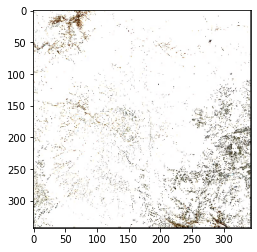

In [79]:
#aws s3 cp s3://sentinel-s2-l2a/tiles/12/T/YK/2019/3/16/0/R10m/TCI.jp2 . --request-payer
import boto3
import io
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
s3 = boto3.resource('s3')
loc = items2[0].assets['overview']['href'].replace('s3://sentinel-s2-l2a/','')
print(loc)
bucket = s3.Bucket('sentinel-s2-l2a')
object = bucket.Object(loc)

    
file_stream = io.BytesIO()
object.download_fileobj(file_stream,ExtraArgs={'RequestPayer':'requester'})
img = mpimg.imread(file_stream,format="jp2")
imgplot = plt.imshow(img)
plt.show(imgplot)
#fil = s3.get_object(Bucket='sentinel-s2-l2a',Key=loc,RequestPayer='requester')
# with open('test.jp2', 'wb') as f:

#     s3.download_fileobj('sentinel-s2-l2a',loc, f)
#     plt.imshow(f)